<a href="https://colab.research.google.com/github/BChun11/DATA3001/blob/main/EDA_Quincy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load datasets
# Missing values check
# Check statistical measures
# Correlation check

In [2]:
# Import required libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Download data files from github
!git clone https://github.com/nokuik/KDDI-IoT-2019.git

Cloning into 'KDDI-IoT-2019'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 42 (delta 1), reused 9 (delta 1), pack-reused 33
Receiving objects: 100% (42/42), 776.84 MiB | 22.41 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (31/31), done.


In [4]:
# List all '.tar.gz files in IPFIX directory
%cd KDDI-IoT-2019
%cd ipfix
!ls *.tar.gz

/content/KDDI-IoT-2019
/content/KDDI-IoT-2019/ipfix
 amazon_echo_gen2.tar.gz		        nature_remo.tar.gz
 au_network_camera.tar.gz		        panasonic_doorphone.tar.gz
 au_wireless_adapter.tar.gz		        philips_hue_bridge.tar.gz
 bitfinder_awair_breathe_easy.tar.gz	       'planex_camera_one_shot!.tar.gz'
 candy_house_sesami_wi-fi_access_point.tar.gz   planex_smacam_outdoor.tar.gz
 irobot_roomba.tar.gz			        planex_smacam_pantilt.tar.gz
 jvc_kenwood_cu-hb1.tar.gz		        powerelectric_wi-fi_plug.tar.gz
 jvc_kenwood_hdtv_ip_camera.tar.gz	        qrio_hub.tar.gz
 line_clova_wave.tar.gz			        sony_network_camera.tar.gz
 link_japan_eremote.tar.gz		        sony_smart_speaker.tar.gz
 mouse_computer_room_hub.tar.gz		        xiaomi_mijia_led.tar.gz


In [5]:
# List all tar.gz files and store them in a variable
files = !ls -1 *.tar.gz

# Extract each tar.gz file
for file in files:
    print(f"Extract {file} ")
    !tar -xzvf {file}

Extract amazon_echo_gen2.tar.gz 
amazon_echo_gen2.json
Extract au_network_camera.tar.gz 
au_network_camera.json
Extract au_wireless_adapter.tar.gz 
au_wireless_adapter.json
Extract bitfinder_awair_breathe_easy.tar.gz 
bitfinder_awair_breathe_easy.json
Extract candy_house_sesami_wi-fi_access_point.tar.gz 
candy_house_sesami_wi-fi_access_point.json
Extract irobot_roomba.tar.gz 
irobot_roomba.json
Extract jvc_kenwood_cu-hb1.tar.gz 
jvc_kenwood_cu-hb1.json
Extract jvc_kenwood_hdtv_ip_camera.tar.gz 
jvc_kenwood_hdtv_ip_camera.json
Extract line_clova_wave.tar.gz 
line_clova_wave.json
Extract link_japan_eremote.tar.gz 
link_japan_eremote.json
Extract mouse_computer_room_hub.tar.gz 
mouse_computer_room_hub.json
Extract nature_remo.tar.gz 
nature_remo.json
Extract panasonic_doorphone.tar.gz 
panasonic_doorphone.json
Extract philips_hue_bridge.tar.gz 
philips_hue_bridge.json
Extract 'planex_camera_one_shot!.tar.gz' 
planex_camera_one_shot!.json
Extract planex_smacam_outdoor.tar.gz 
planex_smacam

In [6]:
# Print the current working directory
print("Current Working Directory:", os.getcwd())

# List the contents of the current working directory
print("Contents of Current Directory:", os.listdir())

!cd

Current Working Directory: /content/KDDI-IoT-2019/ipfix
Contents of Current Directory: ['line_clova_wave.tar.gz', 'i-o_data_qwatch.tar.gz00', 'sony_smart_speaker.tar.gz', 'au_wireless_adapter.json', 'jvc_kenwood_hdtv_ip_camera.tar.gz', 'nature_remo.json', 'google_home_gen1.tar.gz00', 'sony_smart_speaker.json', 'bitfinder_awair_breathe_easy.tar.gz', 'jvc_kenwood_hdtv_ip_camera.json', 'planex_smacam_pantilt.json', 'sony_bravia.tar.gz00', 'au_wireless_adapter.tar.gz', 'panasonic_doorphone.tar.gz', 'mouse_computer_room_hub.tar.gz', 'irobot_roomba.tar.gz', 'au_network_camera.tar.gz', 'google_home_gen1.tar.gz01', 'nature_remo.tar.gz', 'planex_smacam_pantilt.tar.gz', 'sony_network_camera.tar.gz', 'planex_smacam_outdoor.tar.gz', 'philips_hue_bridge.json', 'sony_network_camera.json', 'link_japan_eremote.json', 'planex_camera_one_shot!.json', 'powerelectric_wi-fi_plug.tar.gz', 'line_clova_wave.json', 'sony_bravia.tar.gz02', 'qrio_hub.json', 'mouse_computer_room_hub.json', 'sony_bravia.tar.gz01',

In [7]:
# Code to generate distinct tables for each json file using a limited subset

# Define the directory where the JSON files are located
json_directory = '/content/KDDI-IoT-2019/ipfix'

# Get the list of all JSON files in the directory
json_files = [f for f in os.listdir(json_directory) if f.endswith('.json')]

# Create distinct tables for each json file
tables = {}
for json_file in json_files:
    # strip .json suffix from device names
    device_name = json_file.split('.')[0]
    # Construct the full path to the JSON file
    json_path = os.path.join(json_directory, json_file)
    # Read the JSON file into a DataFrame, normalize the 'flows' column, and get the first 1000 rows
    df = pd.json_normalize(pd.read_json(json_path, lines=True, nrows=5000)['flows'])
    # Label the DataFrame with the device name
    df['Device'] = device_name
    tables[device_name] = df

# Concatenate all the Dataframes in the tables dictionary into a single Dataframe
df = pd.concat(tables.values(), ignore_index=True)


In [8]:
df['flowStartMilliseconds'] = pd.to_datetime(df['flowStartMilliseconds'])
df['flowEndMilliseconds'] = pd.to_datetime(df['flowEndMilliseconds'])
df.head()

flowStartMilliseconds     flowEndMilliseconds  flowDurationMilliseconds  \
0 2019-06-25 08:36:13.539 2019-06-25 08:36:13.984                     0.445   
1 2019-06-25 08:36:13.984 2019-06-25 08:36:14.319                     0.335   
2 2019-06-25 08:37:11.085 2019-06-25 08:37:11.893                     0.808   
3 2019-06-25 08:37:11.719 2019-06-25 08:37:13.234                     1.515   
4 2019-06-25 08:37:13.045 2019-06-25 08:37:14.230                     1.185   

   reverseFlowDeltaMilliseconds  protocolIdentifier sourceIPv4Address  \
0                         0.010                   6     192.168.1.130   
1                         0.009                   6     192.168.1.130   
2                         0.161                   6     192.168.1.130   
3                         0.199                   6     192.168.1.130   
4                         0.195                   6     192.168.1.130   

   sourceTransportPort  packetTotalCount  octetTotalCount flowAttributes  ...  \
0                56903                 6              453             00  ...   
1                41346                 5              401             00  ...   
2                56905                 5              401             00  ...   
3                41348                 5              401             00  ...   
4                41349                 5              401             00  ...   

  reverseNonEmptyPacketCount reverseDataByteCount  \
0                        1.0                270.0   
1                        1.0                258.0   
2                        1.0                270.0   
3                        1.0                258.0   
4                        1.0                258.0   

   reverseAverageInterarrivalTime  reverseFirstNonEmptyPacketSize  \
0                           145.0                           270.0   
1                            81.0                           258.0   
2                           161.0                           270.0   
3                           329.0                           258.0   
4                           247.0                           258.0   

   reverseLargePacketCount reverseMaxPacketSize  \
0                      1.0                270.0   
1                      1.0                258.0   
2                      1.0                270.0   
3                      1.0                258.0   
4                      1.0                258.0   

  reverseStandardDeviationPayloadLength  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

  reverseStandardDeviationInterarrivalTime reverseBytesPerPacket  \
0                                    202.0                 270.0   
1                                    134.0                 258.0   
2                                    184.0                 270.0   
3                                    462.0                 258.0   
4                                    325.0                 258.0   

                Device  
0  au_wireless_adapter  
1  au_wireless_adapter  
2  au_wireless_adapter  
3  au_wireless_adapter  
4  au_wireless_adapter  

[5 rows x 55 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   flowStartMilliseconds                     110000 non-null  datetime64[ns]
 1   flowEndMilliseconds                       110000 non-null  datetime64[ns]
 2   flowDurationMilliseconds                  110000 non-null  float64       
 3   reverseFlowDeltaMilliseconds              110000 non-null  float64       
 4   protocolIdentifier                        110000 non-null  int64         
 5   sourceIPv4Address                         110000 non-null  object        
 6   sourceTransportPort                       110000 non-null  int64         
 7   packetTotalCount                          110000 non-null  int64         
 8   octetTotalCount                           110000 non-null  int64         
 9   flowAttributes 

In [10]:
df.describe()

flowDurationMilliseconds  reverseFlowDeltaMilliseconds  \
count             110000.000000                 110000.000000   
mean                 166.343278                      0.264358   
std                  508.939802                     14.785455   
min                    0.000000                      0.000000   
25%                    0.076000                      0.000000   
50%                    0.576000                      0.000000   
75%                    0.599000                      0.000000   
max                 1800.000000                   1254.272000   

       protocolIdentifier  sourceTransportPort  packetTotalCount  \
count       110000.000000        110000.000000     110000.000000   
mean            15.398736         42061.693855         11.194655   
std              4.161588         15283.005509         43.488662   
min              1.000000             0.000000          1.000000   
25%             17.000000         37272.750000          2.000000   
50%             17.000000         44546.000000          2.000000   
75%             17.000000         52741.250000          2.000000   
max             58.000000         65487.000000       6041.000000   

       octetTotalCount  destinationTransportPort  reversePacketTotalCount  \
count     1.100000e+05             110000.000000            110000.000000   
mean      1.972247e+03               3394.540336                 2.909918   
std       1.549499e+04              10671.511917                20.612100   
min       4.000000e+01                  0.000000                 0.000000   
25%       1.560000e+02                137.000000                 0.000000   
50%       1.560000e+02                137.000000                 0.000000   
75%       1.560000e+02                137.000000                 0.000000   
max       1.958628e+06              65480.000000              2904.000000   

       reverseOctetTotalCount  ingressInterface  ...  reverseSmallPacketCount  \
count           110000.000000          110000.0  ...             27265.000000   
mean               545.069082               0.0  ...                 2.581551   
std               3676.475056               0.0  ...                17.494075   
min                  0.000000               0.0  ...                 0.000000   
25%                  0.000000               0.0  ...                 0.000000   
50%                  0.000000               0.0  ...                 0.000000   
75%                  0.000000               0.0  ...                 1.000000   
max             503580.000000               0.0  ...              1288.000000   

       reverseNonEmptyPacketCount  reverseDataByteCount  \
count                27265.000000          27265.000000   
mean                     7.356831           1752.211076   
std                     31.622187           6227.804756   
min                      0.000000              0.000000   
25%                      1.000000             52.000000   
50%                      1.000000            111.000000   
75%                      3.000000            828.000000   
max                   2904.000000         464595.000000   

       reverseAverageInterarrivalTime  reverseFirstNonEmptyPacketSize  \
count                    27265.000000                    27265.000000   
mean                      6123.427838                      282.244306   
std                      23090.837091                      438.348877   
min                          0.000000                        0.000000   
25%                          0.000000                       52.000000   
50%                          0.000000                       88.000000   
75%                        113.000000                      258.000000   
max                     281215.000000                     1801.000000   

       reverseLargePacketCount  reverseMaxPacketSize  \
count             27265.000000          27265.000000   
mean                  3.144838            346.098771   
std                  12.68

In [11]:
## Find the unique features (ProtocolIdentifer, destinationTransportPor, vlanId, flowAttributes, collectorname, observationDomainID) for each device
uniq_df = df[['protocolIdentifier', 'destinationTransportPort', 'vlanId', 'flowAttributes', 'Device', 'collectorName', 'observationDomainId', 'silkAppLabel', 'ipClassOfService', 'flowEndReason']]

uniq_df.groupby('Device').agg(lambda x: sorted(list(x.unique()))).reset_index()

Device protocolIdentifier  \
0                        amazon_echo_gen2     [1, 6, 17, 58]   
1                       au_network_camera            [1, 17]   
2                     au_wireless_adapter         [1, 6, 17]   
3            bitfinder_awair_breathe_easy         [1, 6, 17]   
4   candy_house_sesami_wi-fi_access_point         [1, 6, 17]   
5                           irobot_roomba         [1, 6, 17]   
6                      jvc_kenwood_cu-hb1         [1, 6, 17]   
7              jvc_kenwood_hdtv_ip_camera            [1, 17]   
8                         line_clova_wave         [1, 6, 17]   
9                      link_japan_eremote         [1, 6, 17]   
10                mouse_computer_room_hub            [1, 17]   
11                            nature_remo         [1, 6, 17]   
12                    panasonic_doorphone            [6, 17]   
13                     philips_hue_bridge         [1, 6, 17]   
14                planex_camera_one_shot!               [17]   
15                  planex_smacam_outdoor         [1, 6, 17]   
16                  planex_smacam_pantilt         [1, 6, 17]   
17               powerelectric_wi-fi_plug         [1, 6, 17]   
18                               qrio_hub         [1, 6, 17]   
19                    sony_network_camera         [1, 6, 17]   
20                     sony_smart_speaker         [1, 6, 17]   
21                       xiaomi_mijia_led         [1, 6, 17]   

                             destinationTransportPort   vlanId  \
0   [0, 1, 3, 53, 67, 80, 123, 137, 443, 5353, 329...  [0x000]   
1   [1, 3, 53, 67, 123, 137, 10001, 10173, 10194, ...  [0x000]   
2   [1, 3, 53, 67, 80, 137, 443, 33714, 33831, 346...  [0x000]   
3   [0, 1, 53, 67, 137, 443, 8883, 53215, 53219, 5...  [0x000]   
4                  [1, 53, 67, 123, 137, 8883, 37817]  [0x000]   
5   [1, 3, 53, 67, 123, 137, 443, 8883, 49161, 491...  [0x000]   
6   [0, 3, 53, 67, 137, 443, 1900, 10001, 32931, 3...  [0x000]   
7   [1, 3, 53, 67, 123, 137, 10001, 10019, 10055, ...  [0x000]   
8   [1, 3, 53, 67, 68, 80, 123, 137, 443, 52485, 5...  [0x000]   
9   [0, 1, 3, 53, 67, 68, 80, 137, 1812, 8080, 809...  [0x000]   
10  [3, 67, 137, 161, 5353, 9956, 41699, 43122, 45...  [0x000]   
11  [1, 3, 53, 67, 137, 443, 1285, 2002, 4162, 102...  [0x000]   
12  [53, 67, 137, 443, 30100, 40341, 40343, 40346,...  [0x000]   
13  [0, 1, 3, 53, 67, 80, 123, 137, 443, 1900, 535...  [0x000]   
14                                             [1900]  [0x000]   
15  [0, 1, 3, 53, 67, 80, 123, 137, 10001, 10716, ...  [0x000]   
16  [3, 53, 67, 68, 80, 123, 137, 1024, 1058, 1097...  [0x000]   
17  [1, 3, 53, 67, 123, 443, 10001, 10240, 17133, ...  [0x000]   
18  [1, 3, 53, 67, 68, 137, 443, 49163, 49167, 491...  [0x000]   
19                             [3, 67, 80, 137, 1900]  [0x000]   
20  [0, 3, 53, 67, 80, 123, 137, 443, 1900, 5353, ...  [0x000]   
21  [0, 1, 3, 53, 67, 80, 137, 8053, 21524, 40949,...  [0x000]   

      flowAttributes collectorName observationDomainId silkAppLabel  \
0           [00, 01]          [C1]                 [0]          [0]   
1           [00, 01]          [C1]                 [0]          [0]   
2           [00, 01]          [C1]                 [0]          [0]   
3           [00, 01]          [C1]                 [0]          [0]   
4           [00, 01]          [C1]                 [0]          [0]   
5           [00, 01]          [C1]                 [0]          [0]   
6           [00, 01]          [C1]                 [0]          [0]   
7   [00, 01, 08, 09]          [C1]                 [0]          [0]   
8           [00, 01]          [C1]                 [0]          [0]   
9           [00, 01]          [C1]                 [0]          [0]   
10  [00, 01, 08, 09]          [C1]                 [0]          [0]   
11          [00, 01]          [C1]                 [0]          [0]   
12          [00, 01]          [C1]                 [0]          [0]   
13          [00, 01]          [C1]               

In [12]:
# ids = uniq_df[['Device', 'ProtocolIdentifier']]
# uniq_df.groupby('Device').agg(lambda x: )#sorted(list(x.unique()))).reset_index()

SyntaxError: ignored

In [13]:
# Analyse each feature over time

In [14]:
# Group by device, and analyse unique 'categorical' features per device
desc_df = df.drop(columns=['protocolIdentifier','sourceTransportPort', 'destinationTransportPort', 'vlanId', 'flowAttributes', 'collectorName', 'observationDomainId', 'silkAppLabel', 'ipClassOfService', 'flowEndReason'])
desc_df = desc_df.drop(columns=['ingressInterface', 'egressInterface'])

for col in desc_df.describe():
  if desc_df[col].min() == desc_df[col].max():
    ### These columns need to be removed becasue there is no variance in the dataset
    ### Note: We need to conduct this on the entire dataset not just the first 1000 rows
    print('here', col)
    desc_df = desc_df.drop(columns=[col])

desc_df.describe()


here tcpUrgTotalCount
here reverseTcpUrgTotalCount


flowDurationMilliseconds  reverseFlowDeltaMilliseconds  \
count             110000.000000                 110000.000000   
mean                 166.343278                      0.264358   
std                  508.939802                     14.785455   
min                    0.000000                      0.000000   
25%                    0.076000                      0.000000   
50%                    0.576000                      0.000000   
75%                    0.599000                      0.000000   
max                 1800.000000                   1254.272000   

       packetTotalCount  octetTotalCount  reversePacketTotalCount  \
count     110000.000000     1.100000e+05            110000.000000   
mean          11.194655     1.972247e+03                 2.909918   
std           43.488662     1.549499e+04                20.612100   
min            1.000000     4.000000e+01                 0.000000   
25%            2.000000     1.560000e+02                 0.000000   
50%            2.000000     1.560000e+02                 0.000000   
75%            2.000000     1.560000e+02                 0.000000   
max         6041.000000     1.958628e+06              2904.000000   

       reverseOctetTotalCount  smallPacketCount  nonEmptyPacketCount  \
count           110000.000000     107802.000000        107802.000000   
mean               545.069082          2.962301            10.133189   
std               3676.475056         17.179469            41.841219   
min                  0.000000          0.000000             0.000000   
25%                  0.000000          1.000000             1.000000   
50%                  0.000000          2.000000             2.000000   
75%                  0.000000          2.000000             2.000000   
max             503580.000000       2967.000000          6041.000000   

       dataByteCount  averageInterarrivalTime  ...  reverseSmallPacketCount  \
count   1.078020e+05            107802.000000  ...             27265.000000   
mean    1.619912e+03              3672.484805  ...                 2.581551   
std     1.441515e+04             12791.569678  ...                17.494075   
min     0.000000e+00                 0.000000  ...                 0.000000   
25%     1.000000e+02                34.000000  ...                 0.000000   
50%     1.000000e+02               576.000000  ...                 0.000000   
75%     1.000000e+02               599.000000  ...                 1.000000   
max     1.789480e+06            299798.000000  ...              1288.000000   

       reverseNonEmptyPacketCount  reverseDataByteCount  \
count                27265.000000          27265.000000   
mean                     7.356831           1752.211076   
std                     31.622187           6227.804756   
min                      0.000000              0.000000   
25%                      1.000000             52.000000   
50%                      1.000000            111.000000   
75%                      3.000000            828.000000   
max                   2904.000000         464595.000000   

       reverseAverageInterarrivalTime  reverseFirstNonEmptyPacketSize  \
count                    27265.000000                    27265.000000   
mean                      6123.427838                      282.244306   
std                      23090.837091                      438.348877   
min                          0.000000                        0.000000   
25%                          0.000000                       52.000000   
50%                          0.000000                       88.000000   
75%                        113.000000                      258.000000   
max                     281215.000000                     1801.000000   

       reverseLargePacketCount  reverseMaxPacketSize  \
count             27265.000000          27265.000000   
mean                  3.144838            346.098771   
std                  12.689452            508.070328   
min                   0.

In [15]:
## find description for each device
for device in df['Device'].unique():
  res = desc_df[desc_df['Device'] == device]
  display(device)
  display(res.describe())

'au_wireless_adapter'

flowDurationMilliseconds  reverseFlowDeltaMilliseconds  \
count               5000.000000                   5000.000000   
mean                  35.739592                      0.047346   
std                  245.862136                      1.026790   
min                    0.000000                      0.000000   
25%                    0.328000                      0.000000   
50%                    0.445500                      0.008000   
75%                    0.580000                      0.009000   
max                 1792.445000                     63.194000   

       packetTotalCount  octetTotalCount  reversePacketTotalCount  \
count       5000.000000      5000.000000              5000.000000   
mean           5.146800       437.044400                 3.469800   
std            8.036228       777.292218                 3.714007   
min            1.000000        40.000000                 0.000000   
25%            2.000000       156.000000                 0.000000   
50%            5.000000       401.000000                 5.000000   
75%            5.000000       401.000000                 5.000000   
max           81.000000     10956.000000                47.000000   

       reverseOctetTotalCount  smallPacketCount  nonEmptyPacketCount  \
count             5000.000000       4877.000000          4877.000000   
mean               405.500200          0.951200             2.236006   
std                553.159871          2.999329             6.410476   
min                  0.000000          0.000000             0.000000   
25%                  0.000000          0.000000             1.000000   
50%                526.000000          0.000000             1.000000   
75%                538.000000          2.000000             2.000000   
max               8050.000000         30.000000            58.000000   

       dataByteCount  averageInterarrivalTime  ...  reverseSmallPacketCount  \
count    4877.000000              4877.000000  ...               3245.00000   
mean      197.895838               882.166906  ...                  0.49584   
std       508.976805              4427.179523  ...                  3.78186   
min         0.000000                 0.000000  ...                  0.00000   
25%       100.000000                80.000000  ...                  0.00000   
50%       133.000000               113.000000  ...                  0.00000   
75%       133.000000               560.000000  ...                  0.00000   
max      6712.000000             90550.000000  ...                 37.00000   

       reverseNonEmptyPacketCount  reverseDataByteCount  \
count                 3245.000000           3245.000000   
mean                     1.534669            339.725424   
std                      3.712019            489.994678   
min                      0.000000              0.000000   
25%                      1.000000            258.000000   
50%                      1.000000            270.000000   
75%                      1.000000            270.000000   
max                     42.000000           5598.000000   

       reverseAverageInterarrivalTime  reverseFirstNonEmptyPacketSize  \
count                     3245.000000                     3245.000000   
mean                      1019.536826                      279.089985   
std                       7254.335016                      170.456475   
min                          0.000000                        0.000000   
25%                         77.000000                      258.000000   
50%                         81.000000                      258.000000   
75%                        134.000000                      270.000000   
max                      61149.000000                     1402.000000   

       reverseLargePacketCount  reverseMaxPacketSize  \
count              3245.000000           3245.000000   
mean                  1.014484            281.770108   
std                   0.449112            189.883879   
min                   0.

'nature_remo'

flowDurationMilliseconds  reverseFlowDeltaMilliseconds  \
count               5000.000000                   5000.000000   
mean                 116.092863                      0.076987   
std                  436.039039                      3.893843   
min                    0.000000                      0.000000   
25%                    0.575000                      0.000000   
50%                    0.580000                      0.000000   
75%                    0.599000                      0.000000   
max                 1799.529000                    263.157000   

       packetTotalCount  octetTotalCount  reversePacketTotalCount  \
count       5000.000000      5000.000000              5000.000000   
mean           5.114400       418.310200                 1.369600   
std           11.972334      1022.729564                 7.274557   
min            1.000000        40.000000                 0.000000   
25%            2.000000       156.000000                 0.000000   
50%            2.000000       156.000000                 0.000000   
75%            2.000000       156.000000                 0.000000   
max          161.000000     10948.000000                51.000000   

       reverseOctetTotalCount  smallPacketCount  nonEmptyPacketCount  \
count             5000.000000       4992.000000          4992.000000   
mean                94.702600          3.741787             4.845553   
std                570.743168         10.022417            11.393122   
min                  0.000000          0.000000             0.000000   
25%                  0.000000          2.000000             2.000000   
50%                  0.000000          2.000000             2.000000   
75%                  0.000000          2.000000             2.000000   
max               8745.000000        161.000000           161.000000   

       dataByteCount  averageInterarrivalTime  ...  reverseSmallPacketCount  \
count    4992.000000              4992.000000  ...               209.000000   
mean      259.007011              3083.150641  ...                 0.004785   
std       657.020455              9538.029292  ...                 0.069171   
min         0.000000                 0.000000  ...                 0.000000   
25%       100.000000               575.000000  ...                 0.000000   
50%       100.000000               580.000000  ...                 0.000000   
75%       100.000000               599.000000  ...                 0.000000   
max      6440.000000             50116.000000  ...                 1.000000   

       reverseNonEmptyPacketCount  reverseDataByteCount  \
count                  209.000000            209.000000   
mean                     6.468900            956.023923   
std                     10.144165           1472.497154   
min                      0.000000              0.000000   
25%                      1.000000             69.000000   
50%                      3.000000            351.000000   
75%                      8.000000           1053.000000   
max                     42.000000           6821.000000   

       reverseAverageInterarrivalTime  reverseFirstNonEmptyPacketSize  \
count                      209.000000                      209.000000   
mean                     35842.861244                      222.693780   
std                      17701.426412                      383.547024   
min                          0.000000                        0.000000   
25%                      38795.000000                       69.000000   
50%                      43964.000000                      117.000000   
75%                      46896.000000                      117.000000   
max                      48172.000000                     1414.000000   

       reverseLargePacketCount  reverseMaxPacketSize  \
count               209.000000            209.000000   
mean                  0.430622            224.368421   
std                   1.124987            385.504356   
min                   0.

'sony_smart_speaker'

flowDurationMilliseconds  reverseFlowDeltaMilliseconds  \
count               5000.000000                   5000.000000   
mean                  92.644826                      0.041433   
std                  382.611057                      0.127437   
min                    0.000000                      0.000000   
25%                    0.008000                      0.007000   
50%                    0.045000                      0.009000   
75%                    0.424250                      0.042000   
max                 1799.961000                      3.134000   

       packetTotalCount  octetTotalCount  reversePacketTotalCount  \
count       5000.000000      5000.000000              5000.000000   
mean           7.448000      1889.405800                 3.303200   
std           28.489908      9767.070707                12.578669   
min            1.000000        52.000000                 0.000000   
25%            1.000000        60.000000                 1.000000   
50%            1.000000        75.000000                 1.000000   
75%            2.000000       156.000000                 2.000000   
max          330.000000    136320.000000               185.000000   

       reverseOctetTotalCount  smallPacketCount  nonEmptyPacketCount  \
count              5000.00000       5000.000000          5000.000000   
mean                622.08120          3.495200             6.771800   
std                2585.83299         12.926012            28.090944   
min                   0.00000          0.000000             0.000000   
25%                  76.00000          1.000000             1.000000   
50%                  91.00000          1.000000             1.000000   
75%                 194.00000          2.000000             2.000000   
max               68507.00000        171.000000           330.000000   

       dataByteCount  averageInterarrivalTime  ...  reverseSmallPacketCount  \
count    5000.000000              5000.000000  ...              4117.000000   
mean     1659.075400              2106.775200  ...                 1.974253   
std      9051.526147              9900.620676  ...                11.619214   
min         0.000000                 0.000000  ...                 0.000000   
25%        32.000000                 0.000000  ...                 0.000000   
50%        47.000000                 0.000000  ...                 0.000000   
75%       100.000000                82.000000  ...                 1.000000   
max    127080.000000            272930.000000  ...               167.000000   

       reverseNonEmptyPacketCount  reverseDataByteCount  \
count                 4117.000000           4117.000000   
mean                     3.338839            619.604081   
std                     12.880518           2536.432319   
min                      0.000000              0.000000   
25%                      1.000000             60.000000   
50%                      1.000000             75.000000   
75%                      2.000000            242.000000   
max                    185.000000          66547.000000   

       reverseAverageInterarrivalTime  reverseFirstNonEmptyPacketSize  \
count                     4117.000000                     4117.000000   
mean                       921.725043                       75.795482   
std                       5429.112355                      153.126677   
min                          0.000000                        0.000000   
25%                          0.000000                       48.000000   
50%                          0.000000                       60.000000   
75%                          4.000000                       75.000000   
max                     123274.000000                     1433.000000   

       reverseLargePacketCount  reverseMaxPacketSize  \
count              4117.000000           4117.000000   
mean                  0.432839            363.822444   
std                   1.885103            552.750748   
min                   0.

'jvc_kenwood_hdtv_ip_camera'

flowDurationMilliseconds  reverseFlowDeltaMilliseconds  \
count               5000.000000                   5000.000000   
mean                 168.037022                      0.150145   
std                  518.445998                      5.749579   
min                    0.000000                      0.000000   
25%                    0.575000                      0.000000   
50%                    0.580000                      0.000000   
75%                    0.599000                      0.000000   
max                 1793.484000                    285.227000   

       packetTotalCount  octetTotalCount  reversePacketTotalCount  \
count       5000.000000      5000.000000              5000.000000   
mean           9.039800      2024.353600                 4.911000   
std           42.462586     11145.383852                24.742642   
min            1.000000        59.000000                 0.000000   
25%            2.000000       156.000000                 0.000000   
50%            2.000000       156.000000                 0.000000   
75%            2.000000       156.000000                 0.000000   
max         1974.000000    474096.000000               994.000000   

       reverseOctetTotalCount  smallPacketCount  nonEmptyPacketCount  \
count             5000.000000       5000.000000          5000.000000   
mean              1474.139600          1.907200             9.039800   
std               5808.416067          5.695145            42.462586   
min                  0.000000          0.000000             1.000000   
25%                  0.000000          2.000000             2.000000   
50%                  0.000000          2.000000             2.000000   
75%                  0.000000          2.000000             2.000000   
max             102484.000000        375.000000          1974.000000   

       dataByteCount  averageInterarrivalTime  ...  reverseSmallPacketCount  \
count    5000.000000              5000.000000  ...               397.000000   
mean     1771.280800              3124.287400  ...                 0.778338   
std      9980.744551              7861.690207  ...                11.384964   
min        31.000000                 0.000000  ...                 0.000000   
25%       100.000000               575.000000  ...                 0.000000   
50%       100.000000               580.000000  ...                 0.000000   
75%       100.000000               599.000000  ...                 0.000000   
max    418824.000000             34092.000000  ...               220.000000   

       reverseNonEmptyPacketCount  reverseDataByteCount  \
count                  397.000000            397.000000   
mean                    61.851385          16834.151134   
std                     64.788082           8948.585320   
min                      1.000000             48.000000   
25%                     72.000000          20736.000000   
50%                     72.000000          20736.000000   
75%                     72.000000          20736.000000   
max                    994.000000          74652.000000   

       reverseAverageInterarrivalTime  reverseFirstNonEmptyPacketSize  \
count                      397.000000                      397.000000   
mean                     19930.261965                      246.846348   
std                      10102.421778                       88.154989   
min                          0.000000                       40.000000   
25%                      25014.000000                      288.000000   
50%                      25044.000000                      288.000000   
75%                      25050.000000                      288.000000   
max                      26351.000000                      300.000000   

       reverseLargePacketCount  reverseMaxPacketSize  \
count               397.000000            397.000000   
mean                 57.740554            249.647355   
std                  28.886589             90.441546   
min                   0.

'planex_smacam_pantilt'

flowDurationMilliseconds  reverseFlowDeltaMilliseconds  \
count               5000.000000                   5000.000000   
mean                  28.588758                      0.045108   
std                  166.002756                      2.074947   
min                    0.000000                      0.000000   
25%                    0.000000                      0.000000   
50%                    0.127000                      0.000000   
75%                   30.840000                      0.000000   
max                 1799.864000                    137.945000   

       packetTotalCount  octetTotalCount  reversePacketTotalCount  \
count       5000.000000     5.000000e+03              5000.000000   
mean           4.933200     9.072060e+02                 2.219400   
std           98.371614     2.966793e+04                48.923197   
min            1.000000     4.000000e+01                 0.000000   
25%            1.000000     7.200000e+01                 0.000000   
50%            2.000000     1.440000e+02                 0.000000   
75%            2.000000     2.160000e+02                 0.000000   
max         6041.000000     1.958628e+06              2904.000000   

       reverseOctetTotalCount  smallPacketCount  nonEmptyPacketCount  \
count             5000.000000       4519.000000          4519.000000   
mean               286.358000          3.204249             4.922107   
std               4446.092437         61.345494           103.475664   
min                  0.000000          0.000000             0.000000   
25%                  0.000000          1.000000             1.000000   
50%                  0.000000          1.000000             1.000000   
75%                  0.000000          2.000000             2.000000   
max             248282.000000       2967.000000          6041.000000   

       dataByteCount  averageInterarrivalTime  ...  reverseSmallPacketCount  \
count   4.519000e+03              4519.000000  ...               885.000000   
mean    8.371812e+02              9720.599690  ...                 4.093785   
std     2.847514e+04             14242.384423  ...                63.288584   
min     0.000000e+00                 0.000000  ...                 0.000000   
25%     4.400000e+01                 0.000000  ...                 0.000000   
50%     8.800000e+01                38.000000  ...                 0.000000   
75%     1.320000e+02             30835.000000  ...                 0.000000   
max     1.789480e+06             65576.000000  ...              1288.000000   

       reverseNonEmptyPacketCount  reverseDataByteCount  \
count                  885.000000            885.000000   
mean                    10.357062           1196.924294   
std                    115.941558           7415.381436   
min                      0.000000              0.000000   
25%                      1.000000            117.000000   
50%                      1.000000            223.000000   
75%                      1.000000            223.000000   
max                   2904.000000         166970.000000   

       reverseAverageInterarrivalTime  reverseFirstNonEmptyPacketSize  \
count                      885.000000                      885.000000   
mean                       813.616949                      189.606780   
std                       4887.390128                       53.199862   
min                          0.000000                        0.000000   
25%                          0.000000                      117.000000   
50%                         30.000000                      223.000000   
75%                         35.000000                      223.000000   
max                      65583.000000                      236.000000   

       reverseLargePacketCount  reverseMaxPacketSize  \
count               885.000000            885.000000   
mean                  2.698305            194.526554   
std                  14.332369             62.805873   
min                   0.

'philips_hue_bridge'

flowDurationMilliseconds  reverseFlowDeltaMilliseconds  \
count               5000.000000                   5000.000000   
mean                 179.546600                      0.019770   
std                  531.270588                      0.076051   
min                    0.000000                      0.000000   
25%                    0.575000                      0.000000   
50%                    0.580000                      0.000000   
75%                    0.599000                      0.000000   
max                 1799.999000                      3.186000   

       packetTotalCount  octetTotalCount  reversePacketTotalCount  \
count       5000.000000      5000.000000              5000.000000   
mean          10.930400      2117.124600                 2.006400   
std           30.169892      9206.899817                10.255759   
min            1.000000        40.000000                 0.000000   
25%            2.000000       156.000000                 0.000000   
50%            2.000000       156.000000                 0.000000   
75%            2.000000       156.000000                 0.000000   
max          210.000000     93973.000000               163.000000   

       reverseOctetTotalCount  smallPacketCount  nonEmptyPacketCount  \
count             5000.000000       4996.000000          4996.000000   
mean               222.447400          2.841273             9.161729   
std               3655.470912          5.592057            28.215620   
min                  0.000000          0.000000             1.000000   
25%                  0.000000          2.000000             2.000000   
50%                  0.000000          2.000000             2.000000   
75%                  0.000000          2.000000             2.000000   
max             185108.000000         38.000000           210.000000   

       dataByteCount  averageInterarrivalTime  ...  reverseSmallPacketCount  \
count    4996.000000               4996.00000  ...               912.000000   
mean     1784.492994               3082.46197  ...                 2.512061   
std      8458.644371               8196.21039  ...                 5.373826   
min        32.000000                  0.00000  ...                 0.000000   
25%       100.000000                563.00000  ...                 0.000000   
50%       100.000000                580.00000  ...                 0.000000   
75%       100.000000                599.00000  ...                 1.000000   
max     91201.000000              87268.00000  ...                40.000000   

       reverseNonEmptyPacketCount  reverseDataByteCount  \
count                  912.000000            912.000000   
mean                     3.362939            785.439693   
std                      8.091604           8173.874050   
min                      1.000000             48.000000   
25%                      1.000000             57.000000   
50%                      1.000000            182.000000   
75%                      1.000000            525.000000   
max                    151.000000         178576.000000   

       reverseAverageInterarrivalTime  reverseFirstNonEmptyPacketSize  \
count                      912.000000                      912.000000   
mean                      4662.612939                      270.401316   
std                      10600.991006                      416.556830   
min                          0.000000                       35.000000   
25%                          0.000000                       48.000000   
50%                          0.000000                      129.000000   
75%                        156.000000                      206.000000   
max                      30023.000000                     1801.000000   

       reverseLargePacketCount  reverseMaxPacketSize  \
count               912.000000            912.000000   
mean                  0.449561            278.456140   
std                   4.926872            440.817552   
min                   0.

'sony_network_camera'

flowDurationMilliseconds  reverseFlowDeltaMilliseconds  \
count               5000.000000                   5000.000000   
mean                  53.234515                      0.000006   
std                  300.652970                      0.000148   
min                    0.003000                      0.000000   
25%                    0.567000                      0.000000   
50%                    0.579000                      0.000000   
75%                    0.596000                      0.000000   
max                 1787.974000                      0.004000   

       packetTotalCount  octetTotalCount  reversePacketTotalCount  \
count       5000.000000      5000.000000              5000.000000   
mean           4.218600       558.454600                 0.080800   
std           10.630194      1189.324018                 3.853056   
min            1.000000       156.000000                 0.000000   
25%            2.000000       156.000000                 0.000000   
50%            2.000000       156.000000                 0.000000   
75%            2.000000       156.000000                 0.000000   
max          344.000000     25118.000000               253.000000   

       reverseOctetTotalCount  smallPacketCount  nonEmptyPacketCount  \
count             5000.000000       5000.000000          5000.000000   
mean               134.501000          1.692400             4.121400   
std               7116.431967          0.721586             9.321569   
min                  0.000000          0.000000             1.000000   
25%                  0.000000          2.000000             2.000000   
50%                  0.000000          2.000000             2.000000   
75%                  0.000000          2.000000             2.000000   
max             477759.000000          2.000000            58.000000   

       dataByteCount  averageInterarrivalTime  ...  reverseSmallPacketCount  \
count    5000.000000              5000.000000  ...                13.000000   
mean      437.799400              1443.915400  ...                 0.153846   
std       899.500606              5312.933383  ...                 0.554700   
min       100.000000                 0.000000  ...                 0.000000   
25%       100.000000               567.000000  ...                 0.000000   
50%       100.000000               579.000000  ...                 0.000000   
75%       100.000000               596.000000  ...                 0.000000   
max      7222.000000             32297.000000  ...                 2.000000   

       reverseNonEmptyPacketCount  reverseDataByteCount  \
count                   13.000000             13.000000   
mean                    26.615385          50124.384615   
std                     65.841398         131200.515983   
min                      1.000000            300.000000   
25%                      1.000000            300.000000   
50%                      1.000000            300.000000   
75%                      2.000000            642.000000   
max                    233.000000         464595.000000   

       reverseAverageInterarrivalTime  reverseFirstNonEmptyPacketSize  \
count                       13.000000                       13.000000   
mean                       638.692308                      308.461538   
std                       1076.306832                        9.777656   
min                          0.000000                      300.000000   
25%                          0.000000                      300.000000   
50%                          0.000000                      300.000000   
75%                        592.000000                      319.000000   
max                       2572.000000                      321.000000   

       reverseLargePacketCount  reverseMaxPacketSize  \
count                13.000000             13.000000   
mean                 26.384615            903.846154   
std                  65.250209           1135.735360   
min                   1.

'link_japan_eremote'

flowDurationMilliseconds  reverseFlowDeltaMilliseconds  \
count               5000.000000                   5000.000000   
mean                 106.238746                      0.068742   
std                  419.986647                      4.409110   
min                    0.000000                      0.000000   
25%                    0.575000                      0.000000   
50%                    0.580000                      0.000000   
75%                    0.599000                      0.000000   
max                 1797.293000                    310.770000   

       packetTotalCount  octetTotalCount  reversePacketTotalCount  \
count       5000.000000      5000.000000              5000.000000   
mean           5.806200       424.555400                 2.201400   
std           15.107385      1060.249954                12.373708   
min            1.000000        44.000000                 0.000000   
25%            2.000000       156.000000                 0.000000   
50%            2.000000       156.000000                 0.000000   
75%            2.000000       156.000000                 0.000000   
max          134.000000     13616.000000                78.000000   

       reverseOctetTotalCount  smallPacketCount  nonEmptyPacketCount  \
count             5000.000000       4986.000000          4986.000000   
mean               187.874400          5.652427             5.817489   
std               1041.272974         15.126379            15.127064   
min                  0.000000          0.000000             1.000000   
25%                  0.000000          2.000000             2.000000   
50%                  0.000000          2.000000             2.000000   
75%                  0.000000          2.000000             2.000000   
max               7720.000000        134.000000           134.000000   

       dataByteCount  averageInterarrivalTime  ...  reverseSmallPacketCount  \
count    4986.000000              4986.000000  ...               249.000000   
mean      262.637184              2225.510028  ...                43.518072   
std       651.314864              6630.464259  ...                35.682864   
min        48.000000                 0.000000  ...                 0.000000   
25%       100.000000               575.000000  ...                 0.000000   
50%       100.000000               580.000000  ...                73.000000   
75%       100.000000               599.000000  ...                73.000000   
max     11544.000000             32299.000000  ...                74.000000   

       reverseNonEmptyPacketCount  reverseDataByteCount  \
count                  249.000000            249.000000   
mean                    44.204819           2534.843373   
std                     34.957264           1899.321733   
min                      1.000000             72.000000   
25%                      2.000000            380.000000   
50%                     73.000000           4088.000000   
75%                     73.000000           4088.000000   
max                     78.000000           5536.000000   

       reverseAverageInterarrivalTime  reverseFirstNonEmptyPacketSize  \
count                      249.000000                      249.000000   
mean                     15103.188755                      107.590361   
std                      12212.173916                       99.202022   
min                          0.000000                       56.000000   
25%                         49.000000                       56.000000   
50%                      24925.000000                       56.000000   
75%                      24929.000000                       72.000000   
max                      31516.000000                      392.000000   

       reverseLargePacketCount  reverseMaxPacketSize  \
count               249.000000            249.000000   
mean                  0.200803            109.333333   
std                   0.430490            102.029513   
min                   0.

'planex_camera_one_shot!'

flowDurationMilliseconds  reverseFlowDeltaMilliseconds  \
count               5000.000000                        5000.0   
mean                   0.101537                           0.0   
std                    3.554097                           0.0   
min                    0.000000                           0.0   
25%                    0.000000                           0.0   
50%                    0.000000                           0.0   
75%                    0.000000                           0.0   
max                  169.281000                           0.0   

       packetTotalCount  octetTotalCount  reversePacketTotalCount  \
count       5000.000000      5000.000000                   5000.0   
mean           1.001200       294.352800                      0.0   
std            0.034624        10.179364                      0.0   
min            1.000000       294.000000                      0.0   
25%            1.000000       294.000000                      0.0   
50%            1.000000       294.000000                      0.0   
75%            1.000000       294.000000                      0.0   
max            2.000000       588.000000                      0.0   

       reverseOctetTotalCount  smallPacketCount  nonEmptyPacketCount  \
count                  5000.0            5000.0          5000.000000   
mean                      0.0               0.0             1.001200   
std                       0.0               0.0             0.034624   
min                       0.0               0.0             1.000000   
25%                       0.0               0.0             1.000000   
50%                       0.0               0.0             1.000000   
75%                       0.0               0.0             1.000000   
max                       0.0               0.0             2.000000   

       dataByteCount  averageInterarrivalTime  ...  reverseSmallPacketCount  \
count    5000.000000              5000.000000  ...                      0.0   
mean      266.319200               101.536600  ...                      NaN   
std         9.209901              3554.097196  ...                      NaN   
min       266.000000                 0.000000  ...                      NaN   
25%       266.000000                 0.000000  ...                      NaN   
50%       266.000000                 0.000000  ...                      NaN   
75%       266.000000                 0.000000  ...                      NaN   
max       532.000000            169281.000000  ...                      NaN   

       reverseNonEmptyPacketCount  reverseDataByteCount  \
count                         0.0                   0.0   
mean                          NaN                   NaN   
std                           NaN                   NaN   
min                           NaN                   NaN   
25%                           NaN                   NaN   
50%                           NaN                   NaN   
75%                           NaN                   NaN   
max                           NaN                   NaN   

       reverseAverageInterarrivalTime  reverseFirstNonEmptyPacketSize  \
count                             0.0                             0.0   
mean                              NaN                             NaN   
std                               NaN                             NaN   
min                               NaN                             NaN   
25%                               NaN                             NaN   
50%                               NaN                             NaN   
75%                               NaN                             NaN   
max                               NaN                             NaN   

       reverseLargePacketCount  reverseMaxPacketSize  \
count                      0.0                   0.0   
mean                       NaN                   NaN   
std                        NaN                   NaN   
min                     

'line_clova_wave'

flowDurationMilliseconds  reverseFlowDeltaMilliseconds  \
count               5000.000000                   5000.000000   
mean                  93.764601                      0.123182   
std                  393.037816                      5.268802   
min                    0.000000                      0.000000   
25%                    0.559000                      0.000000   
50%                    0.579000                      0.000000   
75%                    0.599000                      0.000000   
max                 1796.962000                    315.109000   

       packetTotalCount  octetTotalCount  reversePacketTotalCount  \
count       5000.000000     5.000000e+03               5000.00000   
mean           8.164800     2.272187e+03                  3.23900   
std           37.705225     2.432925e+04                 27.49153   
min            1.000000     4.000000e+01                  0.00000   
25%            2.000000     1.560000e+02                  0.00000   
50%            2.000000     1.560000e+02                  0.00000   
75%            2.000000     1.560000e+02                  0.00000   
max         1802.000000     1.571228e+06               1590.00000   

       reverseOctetTotalCount  smallPacketCount  nonEmptyPacketCount  \
count             5000.000000       4929.000000          4929.000000   
mean               430.883600          1.742950             6.010550   
std               5715.212332          0.624077            24.610997   
min                  0.000000          0.000000             0.000000   
25%                  0.000000          2.000000             2.000000   
50%                  0.000000          2.000000             2.000000   
75%                  0.000000          2.000000             2.000000   
max             384897.000000         12.000000          1262.000000   

       dataByteCount  averageInterarrivalTime  ...  reverseSmallPacketCount  \
count   4.929000e+03              4929.000000  ...              1024.000000   
mean    1.950300e+03              1733.223575  ...                 3.941406   
std     2.270717e+04              5797.518557  ...                13.875106   
min     0.000000e+00                 0.000000  ...                 0.000000   
25%     1.000000e+02               556.000000  ...                 1.000000   
50%     1.000000e+02               579.000000  ...                 1.000000   
75%     1.000000e+02               599.000000  ...                 1.000000   
max     1.476528e+06             89273.000000  ...               390.000000   

       reverseNonEmptyPacketCount  reverseDataByteCount  \
count                 1024.000000           1024.000000   
mean                    11.574219           1298.388672   
std                     37.000943           9612.171399   
min                      0.000000              0.000000   
25%                      1.000000             48.000000   
50%                      1.000000             48.000000   
75%                      1.000000            108.000000   
max                    904.000000         302049.000000   

       reverseAverageInterarrivalTime  reverseFirstNonEmptyPacketSize  \
count                     1024.000000                     1024.000000   
mean                      2715.966797                      146.893555   
std                       9207.882136                      340.929368   
min                          0.000000                        0.000000   
25%                          0.000000                       48.000000   
50%                          0.000000                       48.000000   
75%                          0.000000                       60.000000   
max                     174674.000000                     1402.000000   

       reverseLargePacketCount  reverseMaxPacketSize  \
count              1024.000000           1024.000000   
mean                  0.551758            227.531250   
std                   6.442259            480.034294   
min                   0.

'qrio_hub'

flowDurationMilliseconds  reverseFlowDeltaMilliseconds  \
count               5000.000000                   5000.000000   
mean                 128.226495                      0.018502   
std                  362.280071                      0.951138   
min                    0.000000                      0.000000   
25%                    0.576000                      0.000000   
50%                    0.592000                      0.000000   
75%                    0.600000                      0.000000   
max                 1775.910000                     66.809000   

       packetTotalCount  octetTotalCount  reversePacketTotalCount  \
count       5000.000000       5000.00000              5000.000000   
mean           5.159400        429.92380                 2.547000   
std            9.167202        616.31634                 5.217129   
min            1.000000         40.00000                 0.000000   
25%            2.000000        156.00000                 0.000000   
50%            2.000000        156.00000                 0.000000   
75%            2.000000        156.00000                 0.000000   
max           58.000000       3248.00000                15.000000   

       reverseOctetTotalCount  smallPacketCount  nonEmptyPacketCount  \
count              5000.00000       4828.000000          4828.000000   
mean                925.41040          3.196769             4.110812   
std                1976.50625          8.928427             8.811162   
min                   0.00000          0.000000             0.000000   
25%                   0.00000          2.000000             2.000000   
50%                   0.00000          2.000000             2.000000   
75%                   0.00000          2.000000             2.000000   
max                7585.00000         58.000000            58.000000   

       dataByteCount  averageInterarrivalTime  ...  reverseSmallPacketCount  \
count    4828.000000              4828.000000  ...                   1037.0   
mean      269.177092             13143.464582  ...                      0.0   
std       347.183326             44540.268154  ...                      0.0   
min         0.000000                 0.000000  ...                      0.0   
25%       100.000000               576.000000  ...                      0.0   
50%       100.000000               595.000000  ...                      0.0   
75%       100.000000               600.000000  ...                      0.0   
max      1640.000000            281215.000000  ...                      0.0   

       reverseNonEmptyPacketCount  reverseDataByteCount  \
count                 1037.000000           1037.000000   
mean                     5.729990           3976.420444   
std                      1.159316           1596.105857   
min                      0.000000              0.000000   
25%                      6.000000           4690.000000   
50%                      6.000000           4690.000000   
75%                      6.000000           4690.000000   
max                      8.000000           6981.000000   

       reverseAverageInterarrivalTime  reverseFirstNonEmptyPacketSize  \
count                     1037.000000                     1037.000000   
mean                     51663.481196                     1188.968177   
std                      84202.622042                      484.337925   
min                          0.000000                        0.000000   
25%                      21586.000000                     1400.000000   
50%                      21588.000000                     1400.000000   
75%                      23385.000000                     1400.000000   
max                     281215.000000                     1400.000000   

       reverseLargePacketCount  reverseMaxPacketSize  \
count              1037.000000            1037.00000   
mean                  4.108968            1196.99325   
std                   1.799476             492.90330   
min                   0.

'mouse_computer_room_hub'

flowDurationMilliseconds  reverseFlowDeltaMilliseconds  \
count               5000.000000                   5000.000000   
mean                1736.069444                      0.000051   
std                  316.365564                      0.003083   
min                    0.000000                      0.000000   
25%                 1799.980000                      0.000000   
50%                 1799.990000                      0.000000   
75%                 1799.993000                      0.000000   
max                 1800.000000                      0.217000   

       packetTotalCount  octetTotalCount  reversePacketTotalCount  \
count        5000.00000      5000.000000              5000.000000   
mean          107.77980     20776.322200                 0.033000   
std            83.86767     32822.656689                 1.509028   
min             1.00000        78.000000                 0.000000   
25%            92.00000     14720.000000                 0.000000   
50%            92.00000     14720.000000                 0.000000   
75%            92.00000     16560.000000                 0.000000   
max           810.00000    330285.000000                98.000000   

       reverseOctetTotalCount  smallPacketCount  nonEmptyPacketCount  \
count             5000.000000       5000.000000           5000.00000   
mean                 8.062800          6.379200            107.77980   
std                328.622987         35.339643             83.86767   
min                  0.000000          0.000000              1.00000   
25%                  0.000000          0.000000             92.00000   
50%                  0.000000          0.000000             92.00000   
75%                  0.000000          0.000000             92.00000   
max              17884.000000        258.000000            810.00000   

       dataByteCount  averageInterarrivalTime  ...  reverseSmallPacketCount  \
count    5000.000000              5000.000000  ...                 5.000000   
mean    16997.839800             18465.427200  ...                19.600000   
std     29826.725168              4903.534772  ...                29.534725   
min        50.000000                 0.000000  ...                 0.000000   
25%     12144.000000             19780.000000  ...                 0.000000   
50%     12144.000000             19780.000000  ...                12.000000   
75%     12144.000000             19780.000000  ...                15.000000   
max    291918.000000             96213.000000  ...                71.000000   

       reverseNonEmptyPacketCount  reverseDataByteCount  \
count                    5.000000              5.000000   
mean                    33.000000           7142.000000   
std                     38.548671           6386.931345   
min                      4.000000            540.000000   
25%                     10.000000           2172.000000   
50%                     15.000000           5430.000000   
75%                     38.000000          12420.000000   
max                     98.000000          15148.000000   

       reverseAverageInterarrivalTime  reverseFirstNonEmptyPacketSize  \
count                        5.000000                        5.000000   
mean                     17899.600000                      294.800000   
std                      18364.395942                      233.672206   
min                       1141.000000                       36.000000   
25%                       5389.000000                      176.000000   
50%                       8174.000000                      176.000000   
75%                      32070.000000                      543.000000   
max                      42724.000000                      543.000000   

       reverseLargePacketCount  reverseMaxPacketSize  \
count                 5.000000              5.000000   
mean                  9.800000           1263.600000   
std                   7.886698           1235.594715   
min                   0.

'jvc_kenwood_cu-hb1'

flowDurationMilliseconds  reverseFlowDeltaMilliseconds  \
count               5000.000000                   5000.000000   
mean                  23.644864                      0.042510   
std                  172.169447                      0.126681   
min                    0.000000                      0.000000   
25%                    0.001000                      0.001000   
50%                    0.001000                      0.001000   
75%                    0.580000                      0.012000   
max                 1800.000000                      5.021000   

       packetTotalCount  octetTotalCount  reversePacketTotalCount  \
count       5000.000000      5000.000000              5000.000000   
mean           5.040400       672.720000                 3.145000   
std            8.636903      2083.809655                 6.170575   
min            1.000000        52.000000                 0.000000   
25%            1.000000        60.000000                 1.000000   
50%            1.000000        71.000000                 1.000000   
75%            2.000000       156.000000                 1.000000   
max           72.000000     27218.000000                72.000000   

       reverseOctetTotalCount  smallPacketCount  nonEmptyPacketCount  \
count             5000.000000       4269.000000          4269.000000   
mean              1655.616400          1.812134             3.237995   
std               3168.361157          4.479709             7.846348   
min                  0.000000          0.000000             0.000000   
25%                 76.000000          1.000000             1.000000   
50%                 76.000000          1.000000             1.000000   
75%                170.000000          1.000000             4.000000   
max              22752.000000         50.000000            72.000000   

       dataByteCount  averageInterarrivalTime  ...  reverseSmallPacketCount  \
count    4269.000000              4269.000000  ...              3802.000000   
mean      532.639026               771.383696  ...                 0.718306   
std      1994.170822              4725.050775  ...                 0.450468   
min         0.000000                 0.000000  ...                 0.000000   
25%        32.000000                 0.000000  ...                 0.000000   
50%        43.000000                 0.000000  ...                 1.000000   
75%      1105.000000                89.000000  ...                 1.000000   
max     25482.000000            181205.000000  ...                 2.000000   

       reverseNonEmptyPacketCount  reverseDataByteCount  \
count                 3802.000000           3802.000000   
mean                     3.087585           1987.108364   
std                      5.896410           3195.433431   
min                      0.000000              0.000000   
25%                      1.000000             48.000000   
50%                      1.000000            139.000000   
75%                      7.000000           6458.000000   
max                     72.000000          20736.000000   

       reverseAverageInterarrivalTime  reverseFirstNonEmptyPacketSize  \
count                     3802.000000                     3802.000000   
mean                       251.925565                      454.030247   
std                       3954.037775                      592.483418   
min                          0.000000                        0.000000   
25%                          0.000000                       48.000000   
50%                          0.000000                      139.000000   
75%                         92.000000                     1402.000000   
max                     181205.000000                     1402.000000   

       reverseLargePacketCount  reverseMaxPacketSize  \
count              3802.000000           3802.000000   
mean                  2.093635            456.266702   
std                   5.963863            598.592524   
min                   0.

'powerelectric_wi-fi_plug'

flowDurationMilliseconds  reverseFlowDeltaMilliseconds  \
count               5000.000000                   5000.000000   
mean                  32.940732                      0.020891   
std                  235.501791                      0.560482   
min                    0.000000                      0.000000   
25%                    0.010000                      0.010000   
50%                    0.011000                      0.010000   
75%                    0.017000                      0.011000   
max                 1773.924000                     39.431000   

       packetTotalCount  octetTotalCount  reversePacketTotalCount  \
count       5000.000000       5000.00000              5000.000000   
mean           4.066200        416.56160                 3.810000   
std            7.337751        771.39103                 7.089171   
min            1.000000         40.00000                 0.000000   
25%            1.000000         59.00000                 1.000000   
50%            1.000000         59.00000                 1.000000   
75%            1.000000         59.00000                 1.000000   
max           46.000000       4048.00000                46.000000   

       reverseOctetTotalCount  smallPacketCount  nonEmptyPacketCount  \
count             5000.000000       4840.000000          4840.000000   
mean              1329.592600          0.979339             2.598967   
std               2461.511513          0.627590             6.151369   
min                  0.000000          0.000000             0.000000   
25%                116.000000          1.000000             1.000000   
50%                116.000000          1.000000             1.000000   
75%                116.000000          1.000000             1.000000   
max               7951.000000         33.000000            46.000000   

       dataByteCount  averageInterarrivalTime  ...  reverseSmallPacketCount  \
count    4840.000000              4840.000000  ...              4817.000000   
mean      250.351240               831.406198  ...                 0.577123   
std       487.065317              5422.255769  ...                 0.795492   
min         0.000000                 0.000000  ...                 0.000000   
25%        31.000000                 0.000000  ...                 0.000000   
50%        31.000000                 0.000000  ...                 0.000000   
75%        31.000000                 0.000000  ...                 1.000000   
max      2760.000000             41253.000000  ...                 4.000000   

       reverseNonEmptyPacketCount  reverseDataByteCount  \
count                 4817.000000           4817.000000   
mean                     2.963255           1212.098609   
std                      6.321444           2239.068397   
min                      0.000000              0.000000   
25%                      1.000000             88.000000   
50%                      1.000000             88.000000   
75%                      1.000000             88.000000   
max                     46.000000           7151.000000   

       reverseAverageInterarrivalTime  reverseFirstNonEmptyPacketSize  \
count                     4817.000000                     4817.000000   
mean                       834.036952                      328.914470   
std                       5419.159713                      522.242087   
min                          0.000000                        0.000000   
25%                          0.000000                       88.000000   
50%                          0.000000                       88.000000   
75%                          0.000000                       88.000000   
max                      42723.000000                     1402.000000   

       reverseLargePacketCount  reverseMaxPacketSize  \
count              4817.000000           4817.000000   
mean                  0.958480            328.924434   
std                   1.968486            522.238024   
min                   0.

'panasonic_doorphone'

flowDurationMilliseconds  reverseFlowDeltaMilliseconds  \
count               5000.000000                   5000.000000   
mean                  14.640876                      4.344436   
std                  158.422307                     67.448039   
min                    0.000000                      0.000000   
25%                    0.000000                      0.000000   
50%                    0.000000                      0.000000   
75%                    0.001000                      0.001000   
max                 1799.962000                   1254.272000   

       packetTotalCount  octetTotalCount  reversePacketTotalCount  \
count       5000.000000      5000.000000              5000.000000   
mean           1.622600       134.741800                 0.515400   
std            5.752598       517.930166                 2.323024   
min            1.000000        40.000000                 0.000000   
25%            1.000000        64.000000                 0.000000   
50%            1.000000       108.000000                 0.000000   
75%            1.000000       108.000000                 1.000000   
max           82.000000     26597.000000                75.000000   

       reverseOctetTotalCount  smallPacketCount  nonEmptyPacketCount  \
count             5000.000000       4997.000000          4997.000000   
mean                53.240000          0.967981             1.505703   
std                434.170554          5.318572             5.305387   
min                  0.000000          0.000000             0.000000   
25%                  0.000000          0.000000             1.000000   
50%                  0.000000          0.000000             1.000000   
75%                 80.000000          1.000000             1.000000   
max              17575.000000         82.000000            82.000000   

       dataByteCount  averageInterarrivalTime  ...  reverseSmallPacketCount  \
count    4997.000000              4997.000000  ...              1851.000000   
mean       85.232940               441.583350  ...                 1.039978   
std       375.373025              4857.535349  ...                 0.615582   
min         0.000000                 0.000000  ...                 0.000000   
25%        36.000000                 0.000000  ...                 1.000000   
50%        80.000000                 0.000000  ...                 1.000000   
75%        80.000000                 0.000000  ...                 1.000000   
max     22377.000000            198011.000000  ...                13.000000   

       reverseNonEmptyPacketCount  reverseDataByteCount  \
count                 1851.000000           1851.000000   
mean                     1.129119             94.830902   
std                      1.403498            538.188542   
min                      0.000000              0.000000   
25%                      1.000000             52.000000   
50%                      1.000000             52.000000   
75%                      1.000000             52.000000   
max                     33.000000          14611.000000   

       reverseAverageInterarrivalTime  reverseFirstNonEmptyPacketSize  \
count                     1851.000000                     1851.000000   
mean                       868.179363                       63.146407   
std                       8599.453784                      119.061731   
min                          0.000000                        0.000000   
25%                          0.000000                       52.000000   
50%                          0.000000                       52.000000   
75%                          0.000000                       52.000000   
max                     198011.000000                     1332.000000   

       reverseLargePacketCount  reverseMaxPacketSize  \
count              1851.000000           1851.000000   
mean                  0.069152             65.117234   
std                   0.916264            129.247008   
min                   0.

'xiaomi_mijia_led'

flowDurationMilliseconds  reverseFlowDeltaMilliseconds  \
count               5000.000000                   5000.000000   
mean                 117.333674                      0.091709   
std                  440.454820                      4.276624   
min                    0.000000                      0.000000   
25%                    0.575000                      0.000000   
50%                    0.579000                      0.000000   
75%                    0.599000                      0.000000   
max                 1799.997000                    287.710000   

       packetTotalCount  octetTotalCount  reversePacketTotalCount  \
count       5000.000000      5000.000000              5000.000000   
mean          10.663600       663.504200                 4.117600   
std           39.435059      2312.791357                22.360854   
min            1.000000        60.000000                 0.000000   
25%            2.000000       156.000000                 0.000000   
50%            2.000000       156.000000                 0.000000   
75%            2.000000       156.000000                 0.000000   
max          276.000000     17712.000000               247.000000   

       reverseOctetTotalCount  smallPacketCount  nonEmptyPacketCount  \
count             5000.000000       4997.000000          4997.000000   
mean               287.606600          7.719632             7.774265   
std               1563.774005         23.089438            23.285610   
min                  0.000000          0.000000             1.000000   
25%                  0.000000          2.000000             2.000000   
50%                  0.000000          2.000000             2.000000   
75%                  0.000000          2.000000             2.000000   
max              14424.000000        124.000000           147.000000   

       dataByteCount  averageInterarrivalTime  ...  reverseSmallPacketCount  \
count    4997.000000              4997.000000  ...               189.000000   
mean      295.336602              1895.349810  ...               106.201058   
std       820.524433              5739.950194  ...                40.788659   
min        32.000000                 0.000000  ...                 0.000000   
25%       100.000000               575.000000  ...               120.000000   
50%       100.000000               579.000000  ...               122.000000   
75%       100.000000               599.000000  ...               123.000000   
max      6672.000000             32297.000000  ...               127.000000   

       reverseNonEmptyPacketCount  reverseDataByteCount  \
count                  189.000000            189.000000   
mean                   107.354497           3605.126984   
std                     40.938930           1350.041168   
min                      1.000000             32.000000   
25%                    121.000000           4032.000000   
50%                    123.000000           4080.000000   
75%                    124.000000           4112.000000   
max                    146.000000           7248.000000   

       reverseAverageInterarrivalTime  reverseFirstNonEmptyPacketSize  \
count                      189.000000                      189.000000   
mean                     12707.619048                       46.439153   
std                       4810.469157                       53.020096   
min                          0.000000                       32.000000   
25%                      14276.000000                       32.000000   
50%                      14625.000000                       32.000000   
75%                      14866.000000                       32.000000   
max                      15130.000000                      300.000000   

       reverseLargePacketCount  reverseMaxPacketSize  \
count               189.000000            189.000000   
mean                  0.089947            186.968254   
std                   0.491799             75.646709   
min                   0.

'amazon_echo_gen2'

flowDurationMilliseconds  reverseFlowDeltaMilliseconds  \
count               5000.000000                   5000.000000   
mean                  72.629171                      0.064794   
std                  225.542744                      0.899221   
min                    0.000000                      0.000000   
25%                    0.014000                      0.000000   
50%                    0.555000                      0.000000   
75%                    0.595000                      0.012000   
max                 1800.000000                     41.413000   

       packetTotalCount  octetTotalCount  reversePacketTotalCount  \
count       5000.000000      5000.000000               5000.00000   
mean           6.783000      1091.786400                  4.00220   
std           25.403932     12129.266048                 31.50215   
min            1.000000        40.000000                  0.00000   
25%            1.000000        75.000000                  0.00000   
50%            2.000000       156.000000                  0.00000   
75%           10.000000       840.000000                  1.00000   
max         1364.000000    470976.000000               1889.00000   

       reverseOctetTotalCount  smallPacketCount  nonEmptyPacketCount  \
count             5000.000000       4890.000000          4890.000000   
mean               722.437000          3.173006             4.086299   
std               7418.145975          7.791878            12.748665   
min                  0.000000          0.000000             0.000000   
25%                  0.000000          1.000000             1.000000   
50%                  0.000000          2.000000             2.000000   
75%                139.000000          2.000000             2.000000   
max             503580.000000        137.000000           336.000000   

       dataByteCount  averageInterarrivalTime  ...  reverseSmallPacketCount  \
count    4890.000000              4890.000000  ...              2496.000000   
mean      845.151738              5204.457260  ...                 2.227163   
std     11586.342093             12661.142469  ...                10.380887   
min         0.000000                 0.000000  ...                 0.000000   
25%        47.000000                 0.000000  ...                 0.000000   
50%       100.000000               555.000000  ...                 0.000000   
75%       292.000000               583.000000  ...                 1.000000   
max    456760.000000            299798.000000  ...               116.000000   

       reverseNonEmptyPacketCount  reverseDataByteCount  \
count                 2496.000000           2496.000000   
mean                     4.614583           1114.245593   
std                     34.136055           8794.078849   
min                      0.000000              0.000000   
25%                      1.000000             52.000000   
50%                      1.000000            111.000000   
75%                      2.000000            520.000000   
max                   1607.000000         427684.000000   

       reverseAverageInterarrivalTime  reverseFirstNonEmptyPacketSize  \
count                     2496.000000                     2496.000000   
mean                     16253.324920                      208.258013   
std                      29010.788148                      254.007624   
min                          0.000000                        0.000000   
25%                          0.000000                       52.000000   
50%                          0.000000                      111.000000   
75%                      37520.000000                      356.000000   
max                     222124.000000                     1402.000000   

       reverseLargePacketCount  reverseMaxPacketSize  \
count              2496.000000           2496.000000   
mean                  1.098958            354.797676   
std                   5.439725            565.901632   
min                   0.

'planex_smacam_outdoor'

flowDurationMilliseconds  reverseFlowDeltaMilliseconds  \
count                5000.00000                   5000.000000   
mean                  213.96749                      0.022633   
std                   577.53289                      1.111249   
min                     0.00000                      0.000000   
25%                     0.57500                      0.000000   
50%                     0.58300                      0.000000   
75%                     0.59900                      0.000000   
max                  1797.18600                     67.982000   

       packetTotalCount  octetTotalCount  reversePacketTotalCount  \
count        5000.00000     5.000000e+03              5000.000000   
mean            8.91960     1.322813e+03                 1.655000   
std            40.27408     2.924489e+04                12.220828   
min             1.00000     4.000000e+01                 0.000000   
25%             2.00000     1.560000e+02                 0.000000   
50%             2.00000     1.560000e+02                 0.000000   
75%             2.00000     1.560000e+02                 0.000000   
max          2170.00000     1.759188e+06               510.000000   

       reverseOctetTotalCount  smallPacketCount  nonEmptyPacketCount  \
count             5000.000000       4971.000000          4971.000000   
mean               151.664000          5.221887             8.938443   
std               1298.413787         14.933631            40.390860   
min                  0.000000          0.000000             0.000000   
25%                  0.000000          2.000000             2.000000   
50%                  0.000000          2.000000             2.000000   
75%                  0.000000          2.000000             2.000000   
max              58020.000000        448.000000          2170.000000   

       dataByteCount  averageInterarrivalTime  ...  reverseSmallPacketCount  \
count   4.971000e+03              4971.000000  ...               279.000000   
mean    1.078457e+03              4684.534902  ...                 3.906810   
std     2.828172e+04             11155.749917  ...                36.234328   
min     0.000000e+00                 0.000000  ...                 0.000000   
25%     1.000000e+02               575.000000  ...                 0.000000   
50%     1.000000e+02               583.000000  ...                 0.000000   
75%     1.000000e+02               599.000000  ...                 1.000000   
max     1.698428e+06             87481.000000  ...               480.000000   

       reverseNonEmptyPacketCount  reverseDataByteCount  \
count                  279.000000            279.000000   
mean                    29.197133           1872.688172   
std                     43.319632           3672.618813   
min                      0.000000              0.000000   
25%                      1.000000             48.000000   
50%                     46.000000           2760.000000   
75%                     46.000000           2760.000000   
max                    510.000000          46960.000000   

       reverseAverageInterarrivalTime  reverseFirstNonEmptyPacketSize  \
count                      279.000000                      279.000000   
mean                     21225.702509                       84.043011   
std                      19608.317575                       73.649263   
min                          0.000000                        0.000000   
25%                          0.000000                       48.000000   
50%                      39281.000000                       60.000000   
75%                      39315.000000                       60.000000   
max                      43324.000000                      470.000000   

       reverseLargePacketCount  reverseMaxPacketSize  \
count               279.000000            279.000000   
mean                  0.286738             90.580645   
std                   3.025706             91.812954   
min                   0.

'candy_house_sesami_wi-fi_access_point'

flowDurationMilliseconds  reverseFlowDeltaMilliseconds  \
count               5000.000000                   5000.000000   
mean                  60.820593                      0.328169   
std                  318.864093                      4.315075   
min                    0.000000                      0.000000   
25%                    0.575000                      0.000000   
50%                    0.579000                      0.000000   
75%                    0.598000                      0.000000   
max                 1799.998000                     60.122000   

       packetTotalCount  octetTotalCount  reversePacketTotalCount  \
count       5000.000000      5000.000000              5000.000000   
mean           4.552400       344.934200                 1.286200   
std           13.535017      1107.942587                 7.534696   
min            1.000000        64.000000                 0.000000   
25%            2.000000       156.000000                 0.000000   
50%            2.000000       156.000000                 0.000000   
75%            2.000000       156.000000                 0.000000   
max          229.000000     36864.000000               118.000000   

       reverseOctetTotalCount  smallPacketCount  nonEmptyPacketCount  \
count             5000.000000       4963.000000          4963.000000   
mean               126.498000          1.965545             3.084626   
std                706.335189          2.188567             6.082107   
min                  0.000000          0.000000             1.000000   
25%                  0.000000          2.000000             2.000000   
50%                  0.000000          2.000000             2.000000   
75%                  0.000000          2.000000             2.000000   
max              13902.000000        147.000000           150.000000   

       dataByteCount  averageInterarrivalTime  ...  reverseSmallPacketCount  \
count    4963.000000              4963.000000  ...               183.000000   
mean      186.972194              1596.124320  ...                 0.005464   
std       683.824395              5759.789349  ...                 0.073922   
min        36.000000                 0.000000  ...                 0.000000   
25%       100.000000               575.000000  ...                 0.000000   
50%       100.000000               579.000000  ...                 0.000000   
75%       100.000000               597.000000  ...                 0.000000   
max     35072.000000             63574.000000  ...                 1.000000   

       reverseNonEmptyPacketCount  reverseDataByteCount  \
count                  183.000000            183.000000   
mean                    29.038251           2051.202186   
std                     11.542738            869.952662   
min                      1.000000             48.000000   
25%                     30.000000           2070.000000   
50%                     30.000000           2070.000000   
75%                     30.000000           2070.000000   
max                    118.000000           9182.000000   

       reverseAverageInterarrivalTime  reverseFirstNonEmptyPacketSize  \
count                      183.000000                      183.000000   
mean                     50264.502732                       89.775956   
std                      18166.707222                      103.346420   
min                          0.000000                       48.000000   
25%                      55256.500000                       69.000000   
50%                      60000.000000                       69.000000   
75%                      60001.000000                       69.000000   
max                      60011.000000                      820.000000   

       reverseLargePacketCount  reverseMaxPacketSize  \
count               183.000000            183.000000   
mean                  0.081967             90.650273   
std                   0.417808            103.506108   
min                   0.

'irobot_roomba'

flowDurationMilliseconds  reverseFlowDeltaMilliseconds  \
count               5000.000000                   5000.000000   
mean                 117.788027                      0.121634   
std                  440.649838                      7.320731   
min                    0.000000                      0.000000   
25%                    0.575000                      0.000000   
50%                    0.580000                      0.000000   
75%                    0.599000                      0.000000   
max                 1799.994000                    516.788000   

       packetTotalCount  octetTotalCount  reversePacketTotalCount  \
count       5000.000000      5000.000000              5000.000000   
mean           9.620800       515.098800                 5.834800   
std           32.310565      1562.792281                31.199522   
min            1.000000        40.000000                 0.000000   
25%            2.000000       156.000000                 0.000000   
50%            2.000000       156.000000                 0.000000   
75%            2.000000       156.000000                 0.000000   
max          226.000000     28784.000000               226.000000   

       reverseOctetTotalCount  smallPacketCount  nonEmptyPacketCount  \
count              5000.00000       4991.000000          4991.000000   
mean                259.97120          3.791024             3.855941   
std                1496.30174          9.768472             9.875776   
min                   0.00000          0.000000             0.000000   
25%                   0.00000          2.000000             2.000000   
50%                   0.00000          2.000000             2.000000   
75%                   0.00000          2.000000             2.000000   
max               51023.00000         58.000000            58.000000   

       dataByteCount  averageInterarrivalTime  ...  reverseSmallPacketCount  \
count    4991.000000              4991.000000  ...               197.000000   
mean      175.331998              1958.114807  ...                 1.979695   
std       629.010081              5997.917002  ...                 6.730193   
min         0.000000                 0.000000  ...                 0.000000   
25%       100.000000               575.000000  ...                 1.000000   
50%       100.000000               580.000000  ...                 1.000000   
75%       100.000000               599.000000  ...                 2.000000   
max     20224.000000             87991.000000  ...                95.000000   

       reverseNonEmptyPacketCount  reverseDataByteCount  \
count                  197.000000            197.000000   
mean                     3.045685            676.060914   
std                     13.743753           3284.019907   
min                      0.000000              0.000000   
25%                      1.000000             53.000000   
50%                      2.000000            106.000000   
75%                      2.000000            106.000000   
max                    193.000000          42779.000000   

       reverseAverageInterarrivalTime  reverseFirstNonEmptyPacketSize  \
count                      197.000000                      197.000000   
mean                     10193.131980                      113.350254   
std                      19154.718845                      242.903975   
min                          0.000000                        0.000000   
25%                      10343.000000                       53.000000   
50%                      10426.000000                       53.000000   
75%                      10476.000000                       53.000000   
max                     272888.000000                     1400.000000   

       reverseLargePacketCount  reverseMaxPacketSize  \
count               197.000000            197.000000   
mean                  0.522843            219.903553   
std                   3.056565            518.026067   
min                   0.

'bitfinder_awair_breathe_easy'

flowDurationMilliseconds  reverseFlowDeltaMilliseconds  \
count                5000.00000                   5000.000000   
mean                   50.25114                      0.009893   
std                   292.56980                      0.031672   
min                     0.00000                      0.000000   
25%                     0.56700                      0.000000   
50%                     0.57900                      0.000000   
75%                     0.59900                      0.000000   
max                  1799.98500                      0.205000   

       packetTotalCount  octetTotalCount  reversePacketTotalCount  \
count       5000.000000      5000.000000              5000.000000   
mean           9.074800      2648.527800                 7.388600   
std           40.114773     14437.747601                39.915013   
min            1.000000        40.000000                 0.000000   
25%            2.000000       156.000000                 0.000000   
50%            2.000000       156.000000                 0.000000   
75%            2.000000       156.000000                 0.000000   
max          271.000000     93353.000000               266.000000   

       reverseOctetTotalCount  smallPacketCount  nonEmptyPacketCount  \
count             5000.000000       4757.000000          4757.000000   
mean               496.501200          2.688249             8.302502   
std               2031.547409          4.704396            35.590417   
min                  0.000000          0.000000             0.000000   
25%                  0.000000          2.000000             2.000000   
50%                  0.000000          2.000000             2.000000   
75%                  0.000000          2.000000             2.000000   
max              15983.000000         31.000000           233.000000   

       dataByteCount  averageInterarrivalTime  ...  reverseSmallPacketCount  \
count    4757.000000              4757.000000  ...               809.000000   
mean     2422.814169               723.438512  ...                 5.814586   
std     13143.597821              1796.402018  ...                11.244701   
min         0.000000                 0.000000  ...                 0.000000   
25%       100.000000               563.000000  ...                 0.000000   
50%       100.000000               579.000000  ...                 1.000000   
75%       100.000000               599.000000  ...                 1.000000   
max     82705.000000             92559.000000  ...                41.000000   

       reverseNonEmptyPacketCount  reverseDataByteCount  \
count                  809.000000            809.000000   
mean                     7.442522           1247.498146   
std                     10.878126           1504.662932   
min                      0.000000              0.000000   
25%                      1.000000             46.000000   
50%                      1.000000             69.000000   
75%                      6.000000           3378.000000   
max                     45.000000           5339.000000   

       reverseAverageInterarrivalTime  reverseFirstNonEmptyPacketSize  \
count                      809.000000                      809.000000   
mean                      1329.856613                      424.749073   
std                       2802.023413                      605.407769   
min                          0.000000                        0.000000   
25%                          0.000000                       46.000000   
50%                          0.000000                       53.000000   
75%                         62.000000                     1414.000000   
max                       7746.000000                     1414.000000   

       reverseLargePacketCount  reverseMaxPacketSize  \
count               809.000000            809.000000   
mean                  0.914710            425.718171   
std                   1.505401            604.900724   
min                   0.

'au_network_camera'

flowDurationMilliseconds  reverseFlowDeltaMilliseconds  \
count               5000.000000                   5000.000000   
mean                 217.250554                      0.177942   
std                  581.038406                      6.996035   
min                    0.000000                      0.000000   
25%                    0.575000                      0.000000   
50%                    0.580000                      0.000000   
75%                    0.599000                      0.000000   
max                 1797.595000                    285.319000   

       packetTotalCount  octetTotalCount  reversePacketTotalCount  \
count       5000.000000     5.000000e+03              5000.000000   
mean          11.196400     3.029499e+03                 6.882800   
std           50.587003     2.852426e+04                24.683608   
min            1.000000     5.700000e+01                 0.000000   
25%            2.000000     1.560000e+02                 0.000000   
50%            2.000000     1.560000e+02                 0.000000   
75%            2.000000     1.560000e+02                 0.000000   
max         2540.000000     1.612528e+06               738.000000   

       reverseOctetTotalCount  smallPacketCount  nonEmptyPacketCount  \
count             5000.000000       5000.000000          5000.000000   
mean              2116.431600          1.789000            11.196400   
std               6718.717884          3.338968            50.587003   
min                  0.000000          0.000000             1.000000   
25%                  0.000000          2.000000             2.000000   
50%                  0.000000          2.000000             2.000000   
75%                  0.000000          2.000000             2.000000   
max              85162.000000        228.000000          2540.000000   

       dataByteCount  averageInterarrivalTime  ...  reverseSmallPacketCount  \
count   5.000000e+03              5000.000000  ...                549.00000   
mean    2.716000e+03              3741.476600  ...                  0.36612   
std     2.715541e+04              8591.376786  ...                  5.66224   
min     2.900000e+01                 0.000000  ...                  0.00000   
25%     1.000000e+02               575.000000  ...                  0.00000   
50%     1.000000e+02               580.000000  ...                  0.00000   
75%     1.000000e+02               599.000000  ...                  0.00000   
max     1.541408e+06             32299.000000  ...                129.00000   

       reverseNonEmptyPacketCount  reverseDataByteCount  \
count                  549.000000            549.000000   
mean                    62.684882          17520.156648   
std                     45.317624           7930.704850   
min                      1.000000             48.000000   
25%                     72.000000          20736.000000   
50%                     72.000000          20736.000000   
75%                     72.000000          20736.000000   
max                    738.000000          64498.000000   

       reverseAverageInterarrivalTime  reverseFirstNonEmptyPacketSize  \
count                      549.000000                      549.000000   
mean                     20956.153005                      257.169399   
std                       9289.218341                       76.686384   
min                          0.000000                       40.000000   
25%                      25029.000000                      288.000000   
50%                      25040.000000                      288.000000   
75%                      25045.000000                      288.000000   
max                      26806.000000                      300.000000   

       reverseLargePacketCount  reverseMaxPacketSize  \
count               549.000000            549.000000   
mean                 60.451730            259.231330   
std                  26.488256             78.348017   
min                   0.

'au_wireless_adapter'

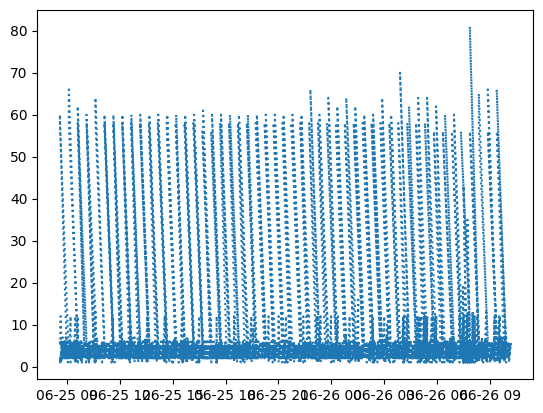

'nature_remo'

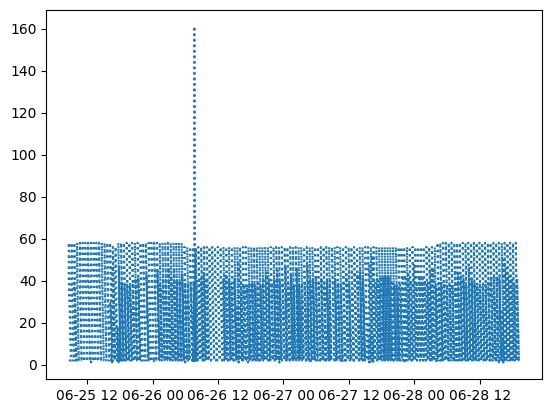

'sony_smart_speaker'

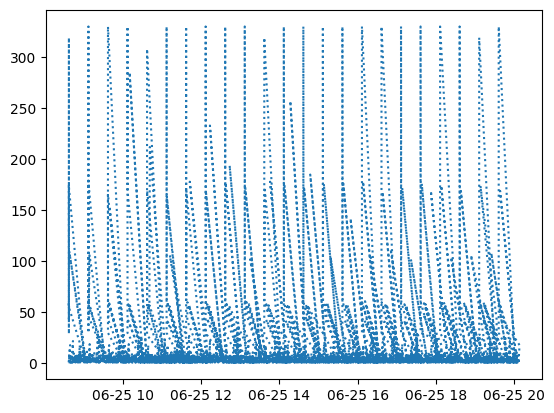

'jvc_kenwood_hdtv_ip_camera'

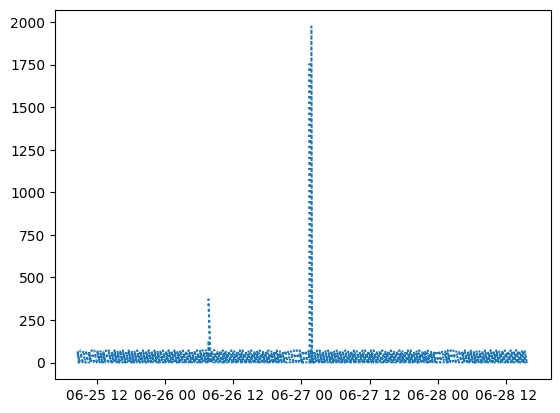

'planex_smacam_pantilt'

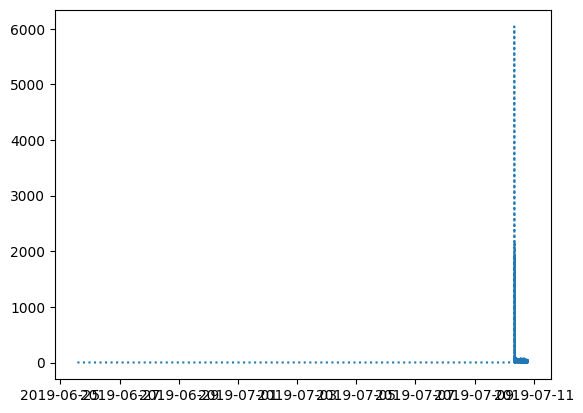

'philips_hue_bridge'

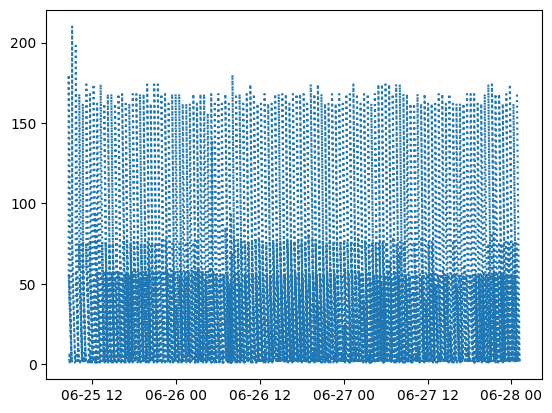

'sony_network_camera'

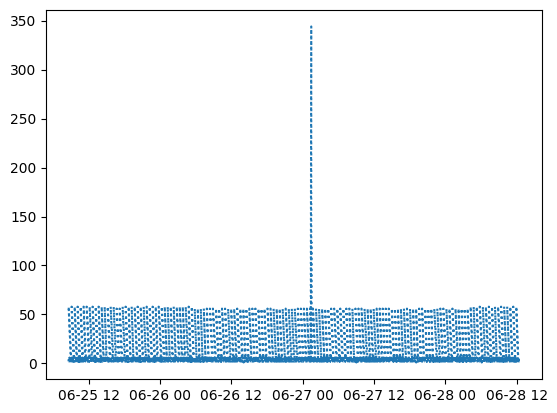

'link_japan_eremote'

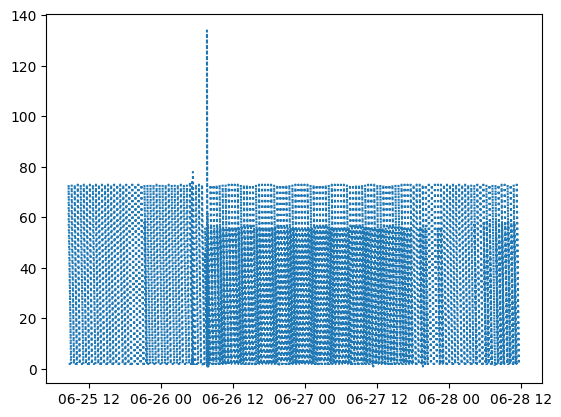

'planex_camera_one_shot!'

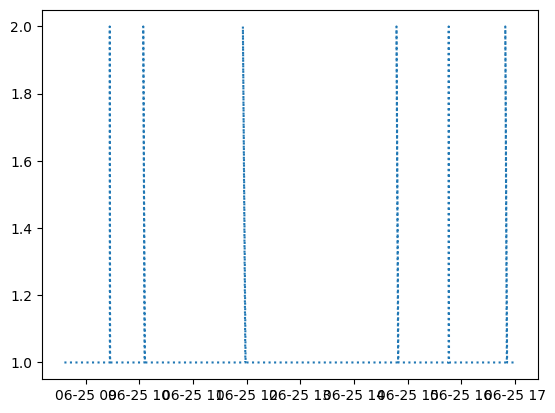

'line_clova_wave'

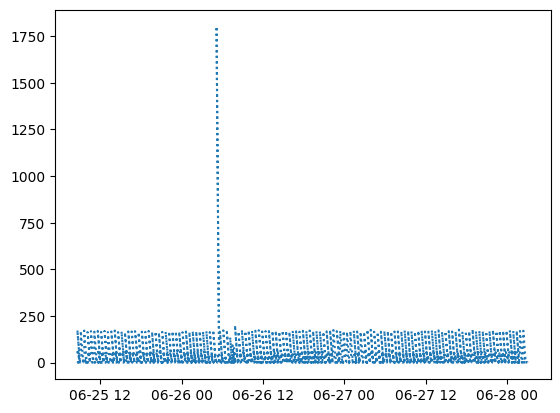

'qrio_hub'

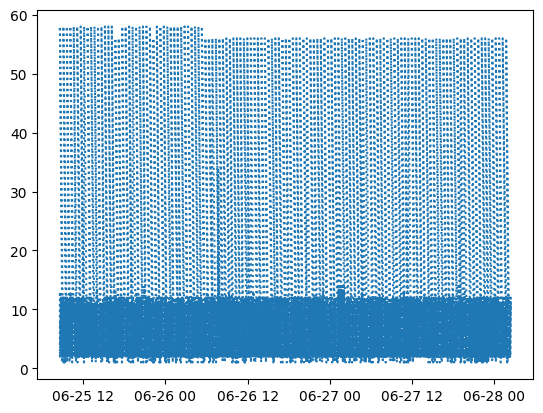

'mouse_computer_room_hub'

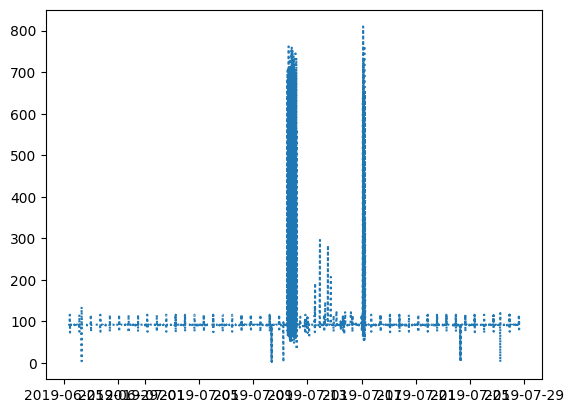

'jvc_kenwood_cu-hb1'

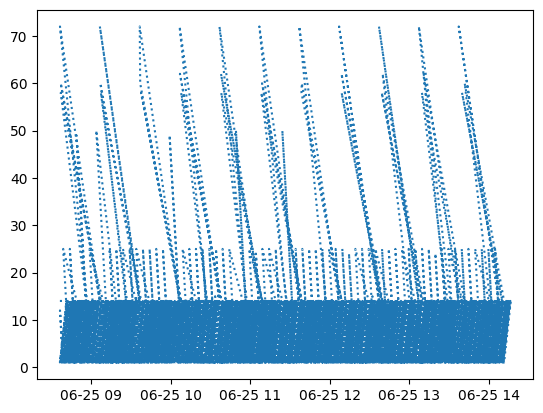

'powerelectric_wi-fi_plug'

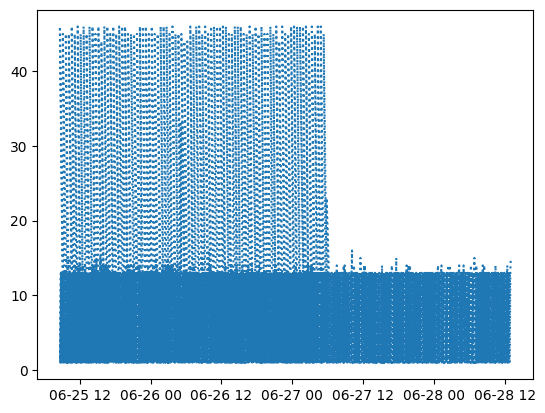

'panasonic_doorphone'

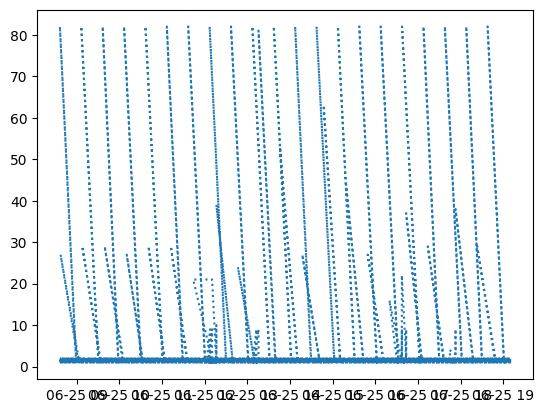

'xiaomi_mijia_led'

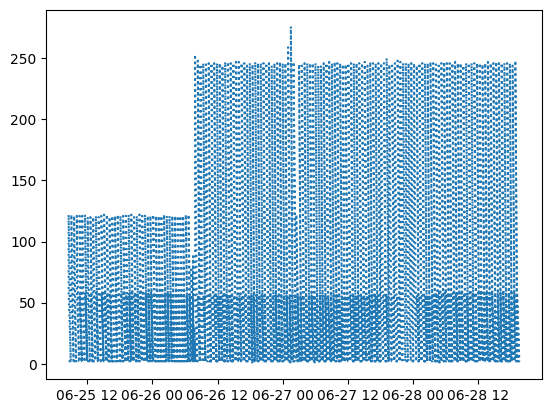

'amazon_echo_gen2'

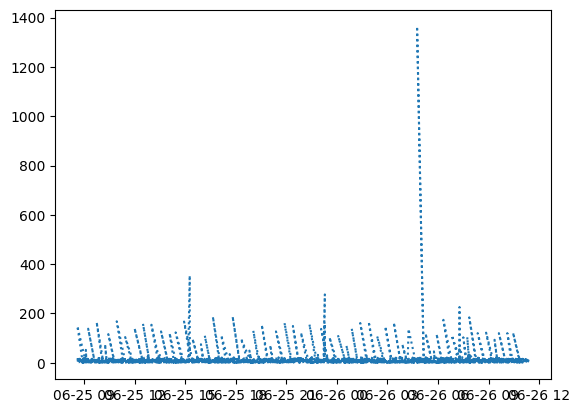

'planex_smacam_outdoor'

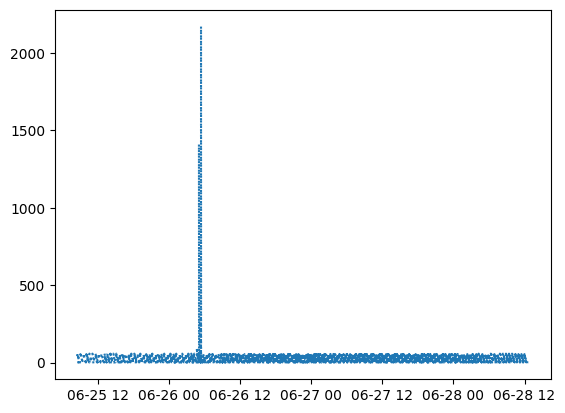

'candy_house_sesami_wi-fi_access_point'

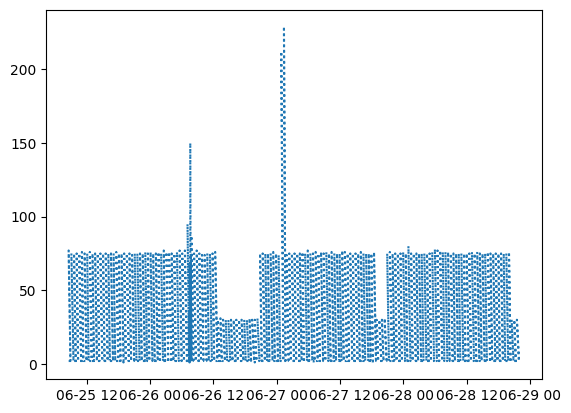

'irobot_roomba'

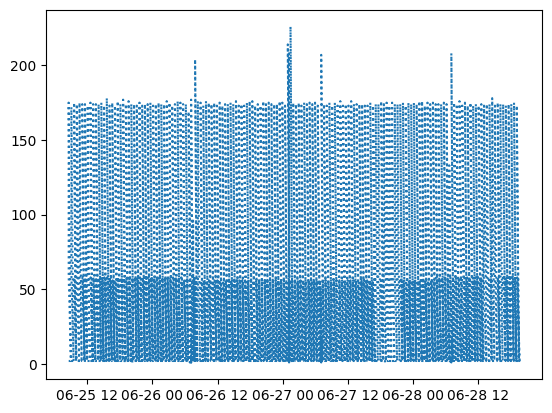

'bitfinder_awair_breathe_easy'

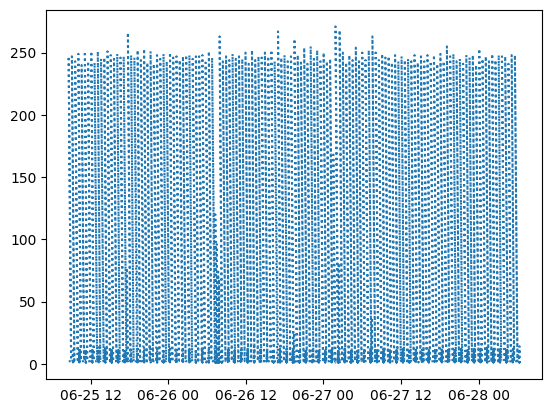

'au_network_camera'

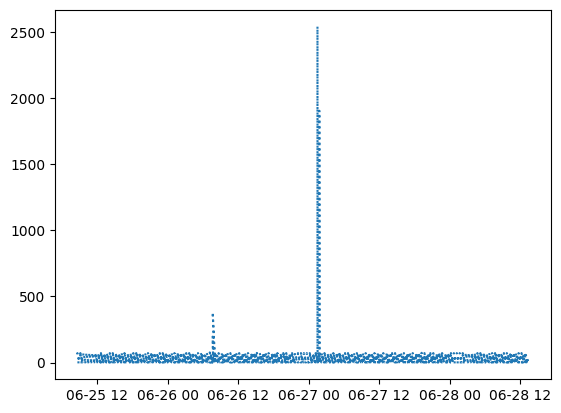

In [16]:
## find description for each device
for device in df['Device'].unique():
  res = desc_df[desc_df['Device'] == device]
  display(device)
  plt.plot(res['flowStartMilliseconds'], res['packetTotalCount'], linestyle = 'dotted')
  plt.show()

# ts = pd.date_range('2022-03-04', periods=10, freq='12h20min')
# df_row = pd.DataFrame({'ts': ts, 'qty': [np.random.randint(10, 100) for i in range(10)]})
# df_col = pd.DataFrame(np.random.randint(0,100,size=(5, 10)), columns = ts)

In [17]:
# Pairplot
# sns.pairplot(df, corner=True)
# plt.tight_layout()
# plt.show()

In [25]:
# # Remove datetime columns
# df_corr = df.drop(columns=["flowStartMilliseconds", 'flowEndMilliseconds','sourceIPv4Address','destinationIPv4Address','sourceMacAddress'])
# df_corr = df_corr.astype(int)
# sns.heatmap(df_corr, vmin=0, vmax=1)
# # df_corr.head()
# plt.show()

IntCastingNaNError: ignored

In [19]:
# Analyse missing values - for each feature
nan_count_feature = df.isna().sum()
nan_count_feature.loc[lambda x: x > 0]

tcpUrgTotalCount                             2198
smallPacketCount                             2198
nonEmptyPacketCount                          2198
dataByteCount                                2198
averageInterarrivalTime                      2198
firstNonEmptyPacketSize                      2198
largePacketCount                             2198
maxPacketSize                                2198
firstEightNonEmptyPacketDirections           2198
standardDeviationPayloadLength               2198
standardDeviationInterarrivalTime            2198
bytesPerPacket                               2370
reverseTcpUrgTotalCount                     82735
reverseSmallPacketCount                     82735
reverseNonEmptyPacketCount                  82735
reverseDataByteCount                        82735
reverseAverageInterarrivalTime              82735
reverseFirstNonEmptyPacketSize              82735
reverseLargePacketCount                     82735
reverseMaxPacketSize                        82735


In [24]:
# Missing values - for each device
nan_count_device = df.drop('Device', 1).isna().groupby(df.Device, sort=False).sum().reset_index()
nan_count_device['Total'] = nan_count_device.sum(axis=1)
nan_count_device = nan_count_device.loc[:, (nan_count_device != 0).any(axis=0)]
nan_count_device[['Device','Total']]

<ipython-input-24-3133796bc370>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  nan_count_device = df.drop('Device', 1).isna().groupby(df.Device, sort=False).sum().reset_index()
<ipython-input-24-3133796bc370>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  nan_count_device['Total'] = nan_count_device.sum(axis=1)


Device  Total
0                     au_wireless_adapter  20810
1                             nature_remo  52850
2                      sony_smart_speaker   9721
3              jvc_kenwood_hdtv_ip_camera  50633
4                   planex_smacam_pantilt  51039
5                      philips_hue_bridge  45016
6                     sony_network_camera  54857
7                      link_japan_eremote  52429
8                 planex_camera_one_shot!  55000
9                         line_clova_wave  44590
10                               qrio_hub  45666
11                mouse_computer_room_hub  54945
12                     jvc_kenwood_cu-hb1  21954
13               powerelectric_wi-fi_plug   4172
14                    panasonic_doorphone  34701
15                       xiaomi_mijia_led  52957
16                       amazon_echo_gen2  28880
17                  planex_smacam_outdoor  52281
18  candy_house_sesami_wi-fi_access_point  53431
19                          irobot_roomba  52944
20           bitfinder_awair_breathe_easy  49027
21                      au_network_camera  48961

### Temporary